In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
churn_df = pd.read_csv("/content/drive/MyDrive/Datasets/Churn.csv")
churn_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [ ]:
churn_df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

### Data Pre-Processing

In [ ]:
# Label Encoder is used for mapping categorical data into 1, 2, 3, 4, 5, 6..
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()

In [ ]:
le_encoder.fit(churn_df['International plan'].drop_duplicates())

LabelEncoder()

In [ ]:
churn_df['International plan'] = le_encoder.transform(churn_df['International plan'])
churn_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,0,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,0,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,0,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,0,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,0,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,0,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,0,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,0,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [ ]:
le_encoder.fit(churn_df['Voice mail plan'].drop_duplicates())

LabelEncoder()

In [ ]:
churn_df['Voice mail plan'] = le_encoder.transform(churn_df['Voice mail plan'])
churn_df 

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


### Correlation

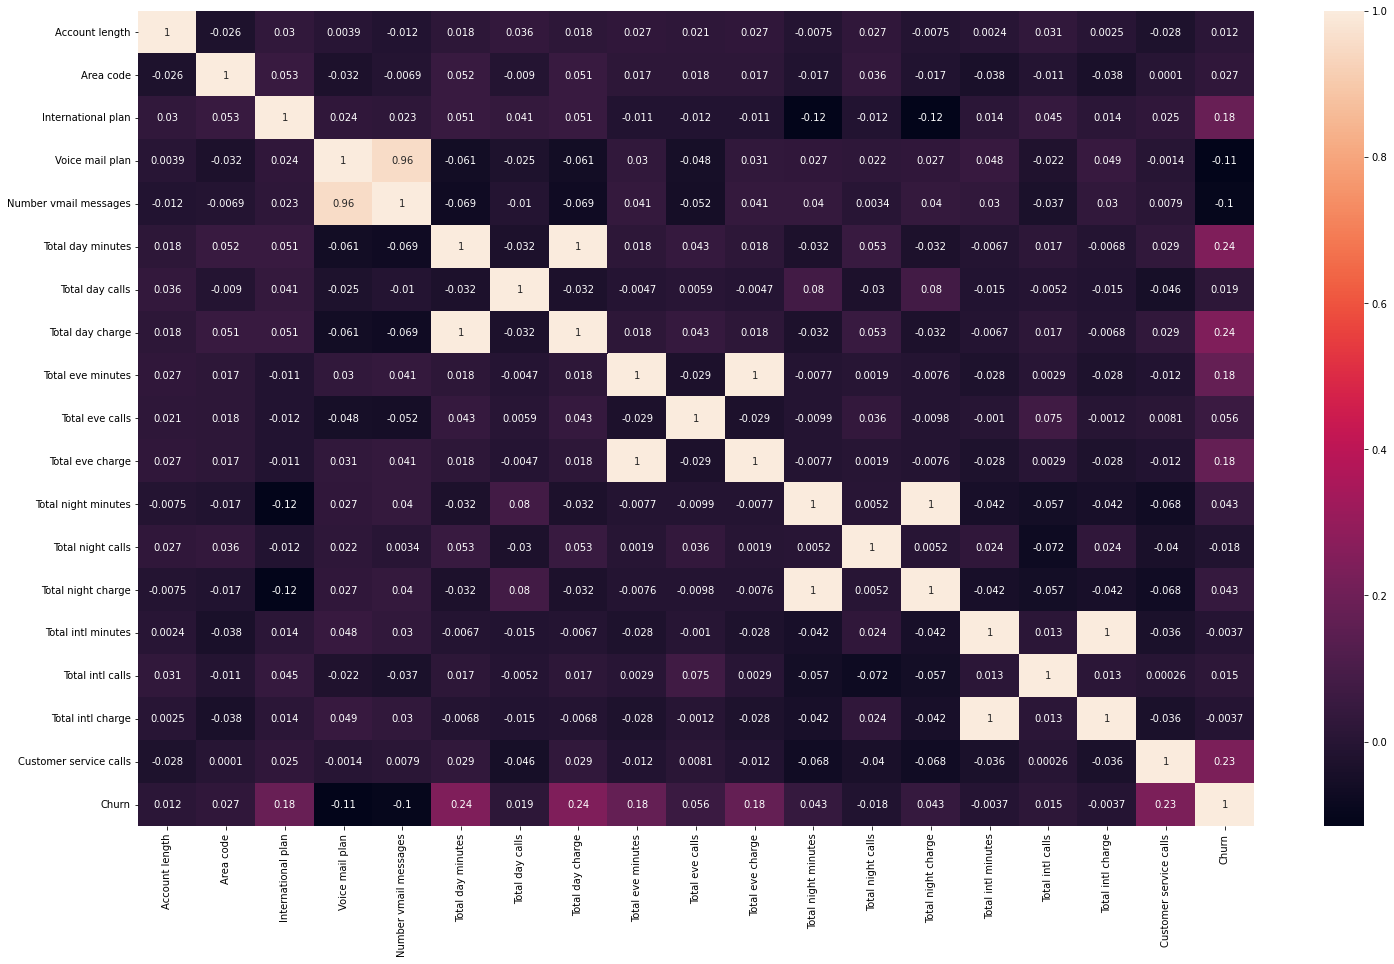

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(churn_df.corr('pearson'), annot = True)

### Feature Selection
**Observations from Heat Map**
* Voice mail plan vs Number of vmail messages - 0.96 - Churn vs Voice mail plan -  -0.11 and Churn Vs Number of vmail messages -  -0.1 so drop Number vmail messages
* total day charge vs total day minutes - 1 - Churn vs both - 0.24 - tie - drop Total day charge
* total eve minutes vs total eve charge - 1 - Churn vs both - 0.18 - drop - Total eve charge
* total night minutes vs total night charge - 1 - Churn vs both -  0.43 - drop - Total night charge
* Total intl charge vs Total intl minutes - 1 - Churn vs both -  -0.0037 - drop -Total intl charge

In [ ]:
churn_df.columns 

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


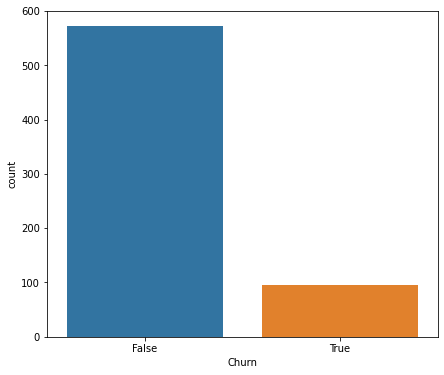

In [ ]:
plt.figure(figsize=(7,6))
sns.countplot('Churn', data = churn_df)

In [ ]:
churn_df['Churn'].value_counts()

False    572
True      95
Name: Churn, dtype: int64

In [ ]:
X = churn_df.drop(['State', 'Number vmail messages', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge', 'Churn'], axis = 1)

In [ ]:
Y = churn_df['Churn']

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size = 0.2, random_state = 3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# maximum depth of decision trees is 9
clf_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 0, max_depth = 9)

In [ ]:
clf_tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=0)

In [ ]:
Y_Pred = clf_tree.predict(X_test)
Y_Pred

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
report = classification_report(Y_Pred, Y_test)

In [ ]:
print(report)

              precision    recall  f1-score   support

       False       0.99      0.94      0.97       119
        True       0.67      0.93      0.78        15

    accuracy                           0.94       134
   macro avg       0.83      0.94      0.87       134
weighted avg       0.95      0.94      0.94       134



In [ ]:
clf_tree.score(X_test, Y_test)

0.9402985074626866

In [ ]:
clf_tree.score(X_train, Y_train)

0.9943714821763602

### Plotting Decision Tree

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:
dot_data = StringIO()
export_graphviz(clf_tree, out_file= dot_data, feature_names=list(X.columns), filled = True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

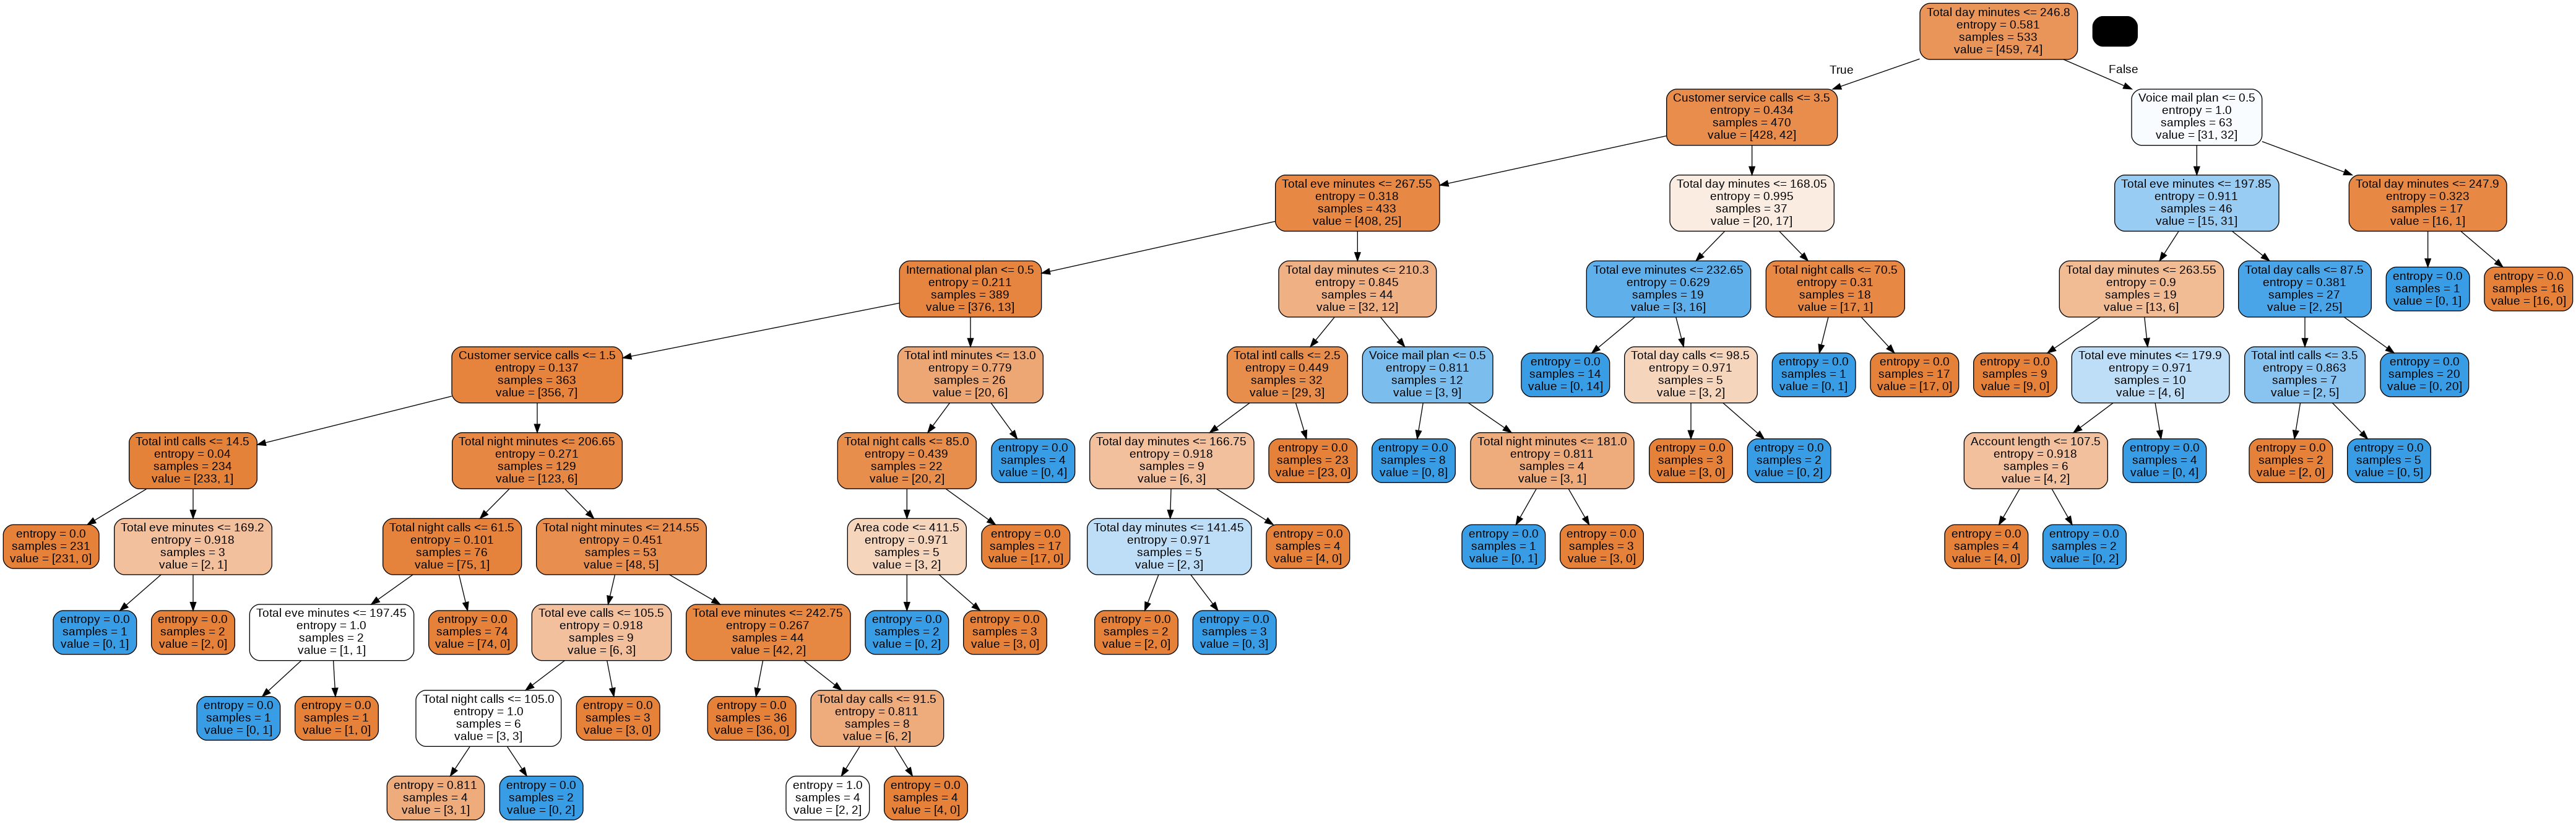

In [ ]:
Image(graph.create_png()) 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,bootstrap=False)
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=False)

In [ ]:
X_train.shape

(533, 13)

In [ ]:
y_pred = rfc.predict(X_test)
y_pred

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
from sklearn import metrics 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(Y_test, y_pred))

ACCURACY OF THE MODEL:  0.9328358208955224


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
report = classification_report(y_pred, Y_test)

In [ ]:
print(report)

              precision    recall  f1-score   support

       False       1.00      0.93      0.96       122
        True       0.57      1.00      0.73        12

    accuracy                           0.93       134
   macro avg       0.79      0.96      0.84       134
weighted avg       0.96      0.93      0.94       134

